<a href="https://colab.research.google.com/github/gesa156/AI-Internn/blob/main/AI_intern_Orgesa_Morina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
!pip install opendatasets


 This part loads the dataset and shows basic info


In [182]:
import opendatasets as od
od.download ("https://www.kaggle.com/datasets/lightningforpython/spam-or-not")
#od.download ("https://www.kaggle.com/datasets/noeyislearning/spam-emails")

Skipping, found downloaded files in "./spam-or-not" (use force=True to force download)


In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/spam-or-not/spam.csv")
#data = pd.read_csv("/content/spam-emails/emails.csv")



In [184]:
data.head()



,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [185]:
data.rename(columns={'Message': 'text', 'Category': 'label'}, inplace=True)


In [186]:
#data['spam'].value_counts()

Performing basic preprocessing (clean text, remove stopwords, lowercase, etc.)


In [187]:
import re
import nltk
import pandas as pd


nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)



data['clean_text'] = data['text'].apply(preprocess_text)
print(data[['text', 'clean_text']].head(10))

                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   
5  FreeMsg Hey there darling it's been 3 week's n...   
6  Even my brother is not like to speak with me. ...   
7  As per your request 'Melle Melle (Oru Minnamin...   
8  WINNER!! As a valued network customer you have...   
9  Had your mobile 11 months or more? U R entitle...   

                                          clean_text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  
5  freemsg hey darling weeks word back id like fu... 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [188]:

print(data.iloc[16


                ][['text', 'clean_text']])


text          Oh k...i'm watching here:)
clean_text               oh kim watching
Name: 16, dtype: object


In [189]:

print("Total messages:", len(data))



Total messages: 5572


Exploratory Analysis:
- Count of samples per category
- Top 10 and 20 most frequent words in the entire dataset
- Most frequent words in each category (ham and spam)


label
ham     4825
spam     747
Name: count, dtype: int64


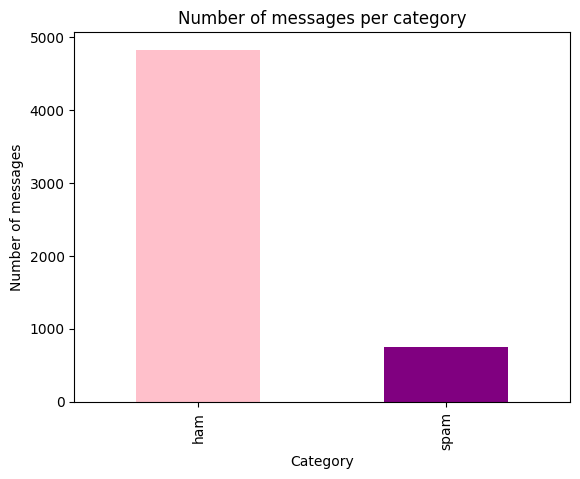

10 most common words: [('u', 1154), ('call', 578), ('im', 476), ('ur', 390), ('get', 390), ('dont', 298), ('go', 285), ('ok', 278), ('free', 278), ('ltgt', 276)]


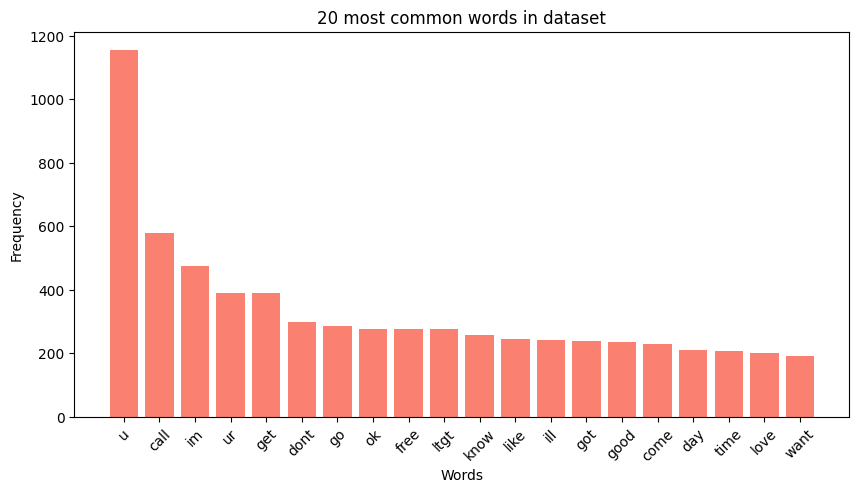

In [190]:
import matplotlib.pyplot as plt
from collections import Counter

# 1. Number of samples per category
print(data['label'].value_counts())

# Visualize with bar chart
data['label'].value_counts().plot(kind='bar', color=['pink', 'purple'])
plt.title("Number of messages per category")
plt.xlabel("Category")
plt.ylabel("Number of messages")
plt.show()

# 2. Most common words in the entire dataset
all_words = ' '.join(data['clean_text']).split()
word_freq = Counter(all_words)

print("10 most common words:", word_freq.most_common(10))

# Visualize top 20 most common words
common_words = word_freq.most_common(20)
words = [w for w, _ in common_words]
counts = [c for _, c in common_words]

plt.figure(figsize=(10,5))
plt.bar(words, counts, color='salmon')
plt.xticks(rotation=45)
plt.title("20 most common words in dataset")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

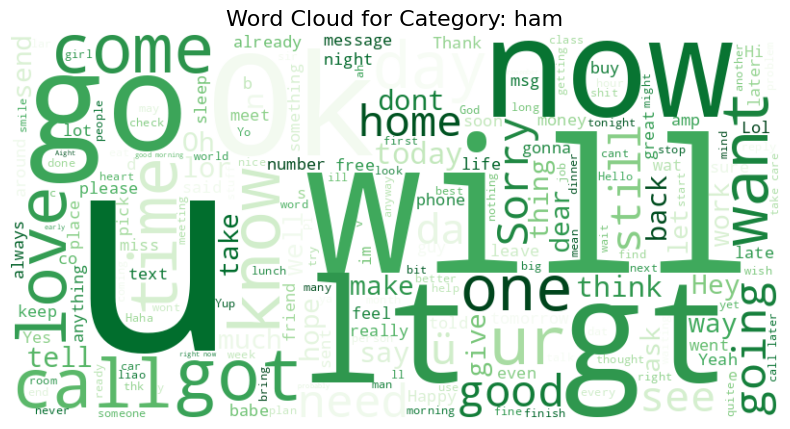

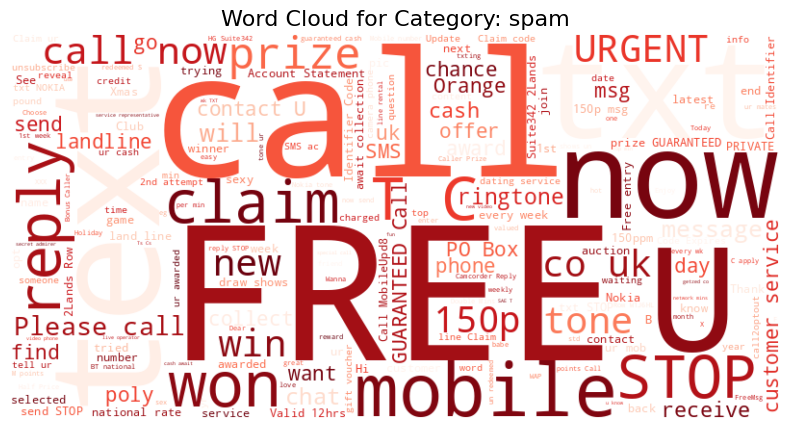

In [191]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

colors = {'spam': 'Reds', 'ham': 'Greens'}

for category in data['label'].unique():
    filtered_df = data[data['label'] == category]

    text = ' '.join(filtered_df['text'])


    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=colors[category.lower()],
        stopwords=STOPWORDS
    ).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}', fontsize=16)
    plt.axis('off')
    plt.show()

In [192]:
data.groupby ('label').describe()

text                                                                 \
      count unique                                                top freq   
label                                                                        
ham    4825   4516                             Sorry, I'll call later   30   
spam    747    641  Please call our customer service representativ...    4   

      clean_text                                                            \
           count unique                                                top   
label                                                                        
ham         4825   4483                               sorry ill call later   
spam         747    581  private account statement shows unredeemed poi...   

            
      freq  
label       
ham     30  
spam     8

Model Training

In [193]:
data['spam']= data['label'].apply(lambda x: 1 if x== 'spam' else 0)
data.head()

,label,text,clean_text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,0


In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.text,data.spam, test_size = 0.25)

In [195]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:4]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [196]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

Prediction Script

In [198]:
emails= [
    'reward money click',
    'Miss u',
    'Dear Friend',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([1, 0, 0, 1])

In [197]:

X_test_count = v.transform(X_test)


y_pred = model.predict(X_test_count)


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1209
           1       0.97      0.91      0.94       184

    accuracy                           0.98      1393
   macro avg       0.98      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393



# Bonus

In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()
X_train_tfidf = v.fit_transform(X_train)
X_test_tfidf = v.transform(X_test)



print(X_train_tfidf.shape)
print(v.get_feature_names_out()[:20])


(4179, 7542)
['00' '000' '000pes' '008704050406' '0089' '0121' '01223585236'
 '01223585334' '0125698789' '02' '0207' '02073162414' '021' '03' '04'
 '0430' '05' '050703' '0578' '06']


=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1209
           1       0.99      0.87      0.92       184

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1209
           1       1.00      0.01      0.01       184

    accuracy                           0.87      1393
   macro avg       0.93      0.50      0.47      1393
weighted avg       0.89      0.87      0.81      1393

=== Support Vector Machine (SVM) ===
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1209
           1       1.00      0.01      0.01       184

    accuracy                           0.87      1393
   macro avg       0.93      0.50      0.47

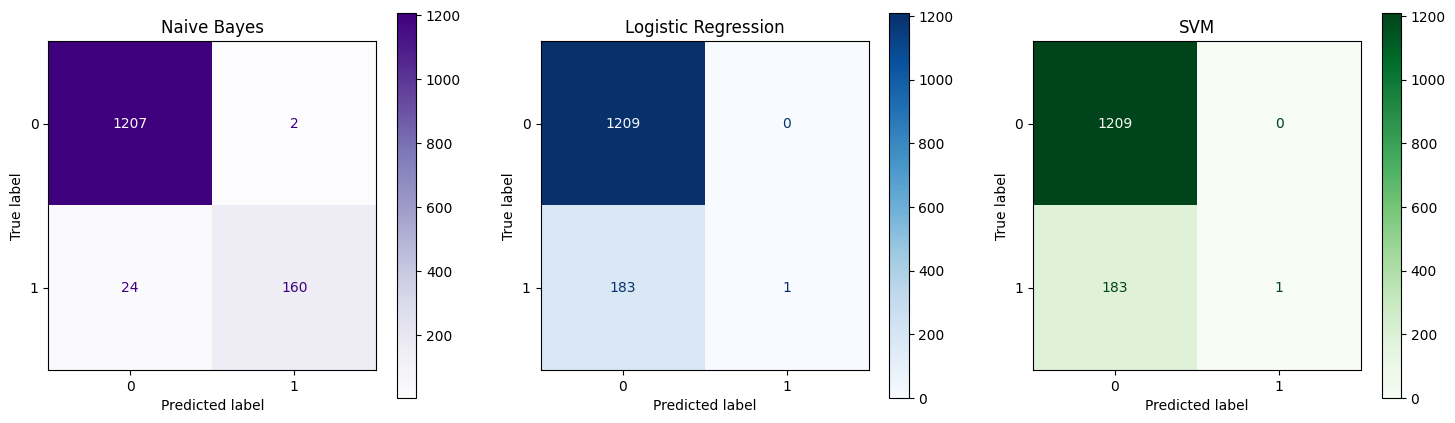

In [205]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#  Modeli 1: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_count, y_train)
y_pred_nb = nb_model.predict(v.transform(X_test))

print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb, zero_division=0))

# Modeli 2: Logistic Regression
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_count, y_train)
y_pred_lr = lr_model.predict(v.transform(X_test))

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, zero_division=0))

# Modeli 3: SVM (LinearSVC)
svm_model = LinearSVC(class_weight='balanced')
svm_model.fit(X_train_count, y_train)
y_pred_svm = svm_model.predict(v.transform(X_test))

print("=== Support Vector Machine (SVM) ===")
print(classification_report(y_test, y_pred_svm, zero_division=0))

# Visual comparison with Confusion Matrix
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_svm = confusion_matrix(y_test, y_pred_svm)

disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)

disp_nb.plot(ax=axes[0], cmap="Purples", values_format='d')
axes[0].set_title("Naive Bayes")

disp_lr.plot(ax=axes[1], cmap="Blues", values_format='d')
axes[1].set_title("Logistic Regression")

disp_svm.plot(ax=axes[2], cmap="Greens", values_format='d')
axes[2].set_title("SVM")

plt.show()
